In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Input\ECG Data\Abnormal Heartbeat Patients\HB(1) - Copy.jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(1).jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(10) - Copy.jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(10).jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(100) - Copy.jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(100).jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(101) - Copy.jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(101).jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(102) - Copy.jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(102).jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(103) - Copy.jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(103).jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(104) - Copy.jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(104).jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(105) - Copy.jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(105).jpg
Input\ECG Data\Abnormal Heartbeat Patients\HB(106) - Copy.jpg
Input\EC

In [12]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf

In [15]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the paths to the data directories
data_dir = 'input/ECG Data'
categories = ['Abnormal Heartbeat Patients', 'Myocardial Infarction Patients', 
              'Normal Person', 'Patient that have History of Myocardial Infraction']

In [16]:
img_size = 128  # Desired image size for resizing

def load_and_preprocess_images(data_dir, categories, img_size):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_label = categories.index(category)  # Assign class labels based on category index
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            try:
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img_array is not None:
                    resized_img = cv2.resize(img_array, (img_size, img_size))
                    data.append([resized_img, class_label])
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                continue
    return data

# Load and preprocess images
data = load_and_preprocess_images(data_dir, categories, img_size)

# Shuffle the data to ensure random distribution
np.random.shuffle(data)

# Split data into features and labels
X, y = zip(*data)
X = np.array(X).reshape(-1, img_size, img_size, 1)  # Reshape for CNN input
y = np.array(y)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (2318, 128, 128, 1)
Testing data shape: (580, 128, 128, 1)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output layer with units equal to number of categories
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

c:\Users\sivag\personal_projects\pst-venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.2669 - loss: 1.5717 - val_accuracy: 0.5000 - val_loss: 1.3057
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 183ms/step - accuracy: 0.4565 - loss: 1.2329 - val_accuracy: 0.7983 - val_loss: 0.8089
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.6931 - loss: 0.7926 - val_accuracy: 0.9000 - val_loss: 0.4103
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - accuracy: 0.8536 - loss: 0.4219 - val_accuracy: 0.9655 - val_loss: 0.1577
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.9226 - loss: 0.2380 - val_accuracy: 0.9690 - val_loss: 0.1210
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.9541 - loss: 0.1600 - val_accuracy: 0.9931 - val_loss: 0.0598
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - accuracy: 0.9627 - loss: 0.1297 - val_accuracy: 0.9914 - val_loss: 0.0383
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.9761 - loss: 0.0801 - val_accu

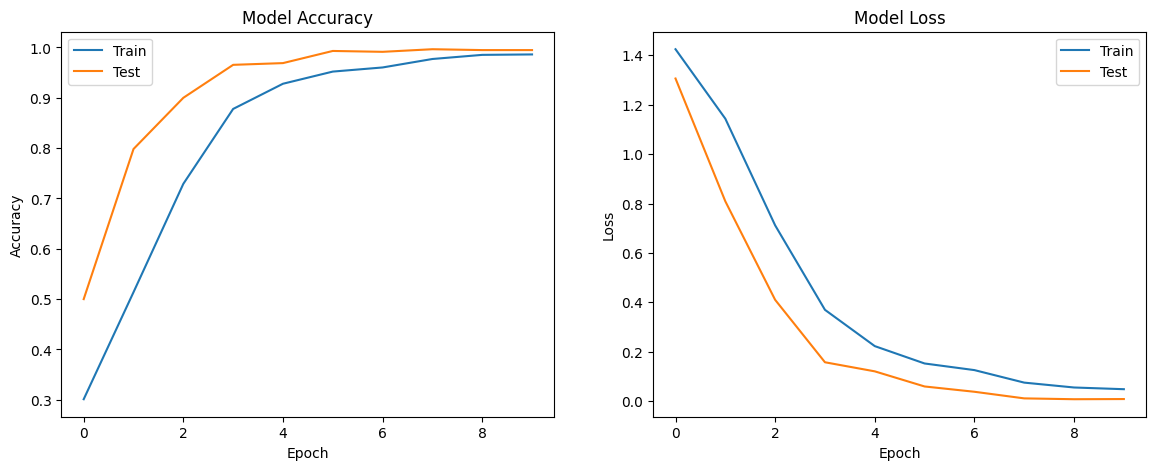

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9946 - loss: 0.0089
Test accuracy: 0.9948275685310364


In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")